# Lead Score Case Study <br>





In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)

### Data Loading & Inspection <br>

In [4]:
# reading data using read_csv

lead_score_df = pd.read_csv('Leads.csv')
lead_score_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# checking dimensionality of dataframe

lead_score_df.shape

(9240, 37)

In [6]:
# checking statistical overview of numerical data 

lead_score_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# checking non-null value counts and dtype of columns

lead_score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# checking no.of nulls in each column

lead_score_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
# checking percentage of null values for more information

round(100*(lead_score_df.isnull().sum()/lead_score_df.shape[0]),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

***In the above code block we can observe that there are columns with very high percentage of null values and these need to be handled***

In [10]:
# checking columns having 'Select' as value. Since it was mentioned in the problem statement to handle it.

lead_score_df.columns[lead_score_df.isin(['Select']).any()].tolist()

['Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City']

In [11]:
# checking no.of rows having 'Select' value

lead_score_df.isin(['Select']).any(axis=1).sum()

6025

***The 'Select' value might imply that the customer didnt fill the data in the form hence these values are similar to null values and hence can be replaced with np.nan***

In [12]:
# Here we can observe that 'Select' value is present in 4 columns and have almost 6025 rows with this value. 
# Hence we can deduce that this is caused because the customer didnt choose an option from the given list while filling up his data.
# Since these doesnt provide much insight we can replace them with null values.

lead_score_df = lead_score_df.replace('Select', np.nan)
lead_score_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [13]:
# checking percentage of nulls after replacing 'Select' values with NaN

round(100*(lead_score_df.isnull().sum()/lead_score_df.shape[0]),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [14]:
# dropping of columns having more than 70% null values and later on analyse other columns with less than 70% nulls individually

lead_score_df.dropna(thresh=lead_score_df.shape[0]*0.30, how='all', axis=1, inplace=True)

In [15]:
# checking percentage of null values
# Here we observe only columns having less than 70% null values

round(100*(lead_score_df.isnull().sum()/lead_score_df.shape[0]),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [16]:
# checking 'Lead Quality' since it has 51% nulls

round(lead_score_df['Lead Quality'].value_counts(normalize=True)*100,2)

Might be             34.88
Not Sure             24.41
High in Relevance    14.24
Worst                13.44
Low in Relevance     13.03
Name: Lead Quality, dtype: float64

In [17]:
# Here we can replace nulls with 'Not Sure' since 'Lead Quality' indicates the quality of lead based on intuition 
# of the employee assigned since 'Not Sure' indicates uncertainity in lead quality of a customer.

lead_score_df['Lead Quality'] = lead_score_df['Lead Quality'].replace(np.nan, 'Not Sure')

In [18]:
# checking for data skewness after replacing nulls

round(lead_score_df['Lead Quality'].value_counts(normalize=True)*100,2)

Not Sure             63.41
Might be             16.88
High in Relevance     6.89
Worst                 6.50
Low in Relevance      6.31
Name: Lead Quality, dtype: float64

***'Lead Quality' can be evaluated further in EDA since it doesnt show any skewness and is important in analysis***

In [19]:
# checking data distribution of Activity Index column (45% nulls)

round(lead_score_df['Asymmetrique Activity Index'].value_counts(normalize=True)*100,2)

02.Medium    76.44
01.High      16.35
03.Low        7.21
Name: Asymmetrique Activity Index, dtype: float64

In [20]:
# checking data distribution of Profile Index column (45% nulls)

round(lead_score_df['Asymmetrique Profile Index'].value_counts(normalize=True)*100,2)

02.Medium    55.52
01.High      43.87
03.Low        0.62
Name: Asymmetrique Profile Index, dtype: float64

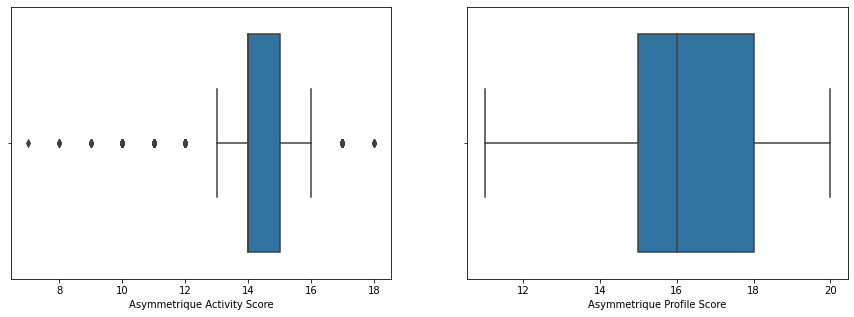

In [21]:
# checking Activity and Profile Score columns since they have 45% nulls

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(lead_score_df['Asymmetrique Activity Score'])
plt.subplot(1,2,2)
sns.boxplot(lead_score_df['Asymmetrique Profile Score'])
plt.show()


In [22]:
# since these variables show different variations imputing 45% nulls with central tendency can cause data skewness
# hence dropping these columns

lead_score_df.drop(['Asymmetrique Activity Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index', 'Asymmetrique Profile Score'], axis=1, inplace=True)

In [23]:
# checking data distribution of 'City' column

round(lead_score_df['City'].value_counts(normalize=True)*100,2)

Mumbai                         57.84
Thane & Outskirts              13.50
Other Cities                   12.31
Other Cities of Maharashtra     8.20
Other Metro Cities              6.82
Tier II Cities                  1.33
Name: City, dtype: float64

In [24]:
# checking the corresponding 'Country' column values where 'City' column has null values

lead_score_df[lead_score_df['City'].isnull()]['Country'].value_counts()

India                   1554
United States             18
United Arab Emirates       9
Singapore                  7
unknown                    5
United Kingdom             3
Asia/Pacific Region        2
Sweden                     2
Qatar                      2
Australia                  2
Oman                       1
South Africa               1
Ghana                      1
China                      1
Uganda                     1
Sri Lanka                  1
Russia                     1
Canada                     1
Hong Kong                  1
Italy                      1
Name: Country, dtype: int64

In [25]:
# Since the 'Country' column is skewed to 'India' value
# checking the number of values in 'Country' column other than 'India' which has null values in 'City'

lead_score_df[(lead_score_df['City'].isnull()) & (lead_score_df['Country']!='India') & (~lead_score_df['Country'].isnull())].shape

(60, 31)

In [26]:
# since there are only 60 records with null values in 'City' which is also from country other than 'India'
# since 'Country' column is skewed to value 'India' it will be logical to remove nulls from 'City' column that is 
# not related to 'India'

# hence dropping these rows

lead_score_df.drop(lead_score_df[(lead_score_df['City'].isnull()) & (lead_score_df['Country']!='India') & (~lead_score_df['Country'].isnull())].index, inplace=True)

In [27]:
# checking count after imputation
# here we see that now only those 'City' with null values are retained which belong to 'India' in 'Country' column

lead_score_df[lead_score_df['City'].isnull()]['Country'].value_counts()

India    1554
Name: Country, dtype: int64

In [28]:
# checking mode() of 'City' column

lead_score_df['City'].mode()

0    Mumbai
dtype: object

In [29]:
# replacing the nulls in 'City' with the mode of 'City' column

lead_score_df['City'] = lead_score_df['City'].replace(np.nan, 'Mumbai')

In [30]:
# checking data distribution after imputation

round(lead_score_df['City'].value_counts(normalize=True)*100,2)

Mumbai                         74.41
Thane & Outskirts               8.19
Other Cities                    7.47
Other Cities of Maharashtra     4.98
Other Metro Cities              4.14
Tier II Cities                  0.81
Name: City, dtype: float64

In [31]:
# checking data distribution of 'Tags' column (36% nulls)

round(lead_score_df['Tags'].value_counts(normalize=True)*100,2)

Will revert after reading the email                  35.26
Ringing                                              20.41
Interested in other courses                           8.65
Already a student                                     7.89
Closed by Horizzon                                    6.11
switched off                                          4.10
Busy                                                  3.16
Lost to EINS                                          2.99
Not doing further education                           2.47
Interested  in full time MBA                          2.00
Graduation in progress                                1.86
invalid number                                        1.40
Diploma holder (Not Eligible)                         1.08
wrong number given                                    0.80
opp hangup                                            0.56
number not provided                                   0.43
in touch with EINS                                    0.

In [32]:
# replacing nulls with mode of 'Tags' column and checking if there is data skewness

lead_score_df['Tags'] = lead_score_df['Tags'].replace(np.nan, 'Will revert after reading the email')

In [33]:
# checking data distribution for skewness after imputation

round(lead_score_df['Tags'].value_counts(normalize=True)*100,2)

Will revert after reading the email                  58.68
Ringing                                              13.03
Interested in other courses                           5.52
Already a student                                     5.03
Closed by Horizzon                                    3.90
switched off                                          2.61
Busy                                                  2.02
Lost to EINS                                          1.91
Not doing further education                           1.58
Interested  in full time MBA                          1.27
Graduation in progress                                1.19
invalid number                                        0.89
Diploma holder (Not Eligible)                         0.69
wrong number given                                    0.51
opp hangup                                            0.36
number not provided                                   0.27
in touch with EINS                                    0.

In [34]:
# checking data distribution of 'Specialization' column (36% nulls)

round(lead_score_df['Specialization'].value_counts(normalize=True)*100,2)

Finance Management                   16.68
Human Resource Management            14.47
Marketing Management                 14.30
Operations Management                 8.58
Business Administration               6.85
IT Projects Management                6.25
Supply Chain Management               5.93
Banking, Investment And Insurance     5.78
Media and Advertising                 3.47
Travel and Tourism                    3.47
International Business                3.04
Healthcare Management                 2.72
Hospitality Management                1.93
E-COMMERCE                            1.91
Retail Management                     1.71
Rural and Agribusiness                1.25
E-Business                            0.97
Services Excellence                   0.68
Name: Specialization, dtype: float64

In [35]:
# checking occupation of customer where 'Specialisation' has nulls

lead_score_df[lead_score_df['Specialization'].isnull()]['What is your current occupation'].value_counts()

Unemployed              1801
Student                   85
Working Professional      31
Businessman                2
Other                      1
Name: What is your current occupation, dtype: int64

In [36]:
# since we observe that most nulls in 'Specialisation' corresponds to Umemployed people and students
# hence replacing nulls with mode of 'Specialization' column and checking if there is data skewness

lead_score_df['Specialization'] = lead_score_df['Specialization'].replace(np.nan, 'Misc')

In [37]:
# checking data distribution for skewness after imputation

round(lead_score_df['Specialization'].value_counts(normalize=True)*100,2)

Misc                                 36.25
Finance Management                   10.63
Human Resource Management             9.23
Marketing Management                  9.12
Operations Management                 5.47
Business Administration               4.37
IT Projects Management                3.99
Supply Chain Management               3.78
Banking, Investment And Insurance     3.68
Media and Advertising                 2.21
Travel and Tourism                    2.21
International Business                1.94
Healthcare Management                 1.73
Hospitality Management                1.23
E-COMMERCE                            1.22
Retail Management                     1.09
Rural and Agribusiness                0.80
E-Business                            0.62
Services Excellence                   0.44
Name: Specialization, dtype: float64

In [38]:
# checking data distribution of 'What is your current occupation' column (29% nulls)

round(lead_score_df['What is your current occupation'].value_counts(normalize=True)*100,2)

Unemployed              85.45
Working Professional    10.80
Student                  3.22
Other                    0.25
Housewife                0.15
Businessman              0.12
Name: What is your current occupation, dtype: float64

In [39]:
# hence replacing nulls with mode of column and checking if there is data skewness

lead_score_df['What is your current occupation'] = lead_score_df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [40]:
# checking data distribution for skewness after imputation
# there is a slight data skewness hence it needs to be furthur analysed during univariate analysis

round(lead_score_df['What is your current occupation'].value_counts(normalize=True)*100,2)

Unemployed              89.67
Working Professional     7.67
Student                  2.29
Other                    0.17
Housewife                0.11
Businessman              0.09
Name: What is your current occupation, dtype: float64

In [41]:
# checking data distribution of 'What matters most to you in choosing a course' column (29% nulls)

round(lead_score_df['What matters most to you in choosing a course'].value_counts(normalize=True)*100,2)

Better Career Prospects      99.95
Flexibility & Convenience     0.03
Other                         0.02
Name: What matters most to you in choosing a course, dtype: float64

In [42]:
# since it shows very high data skewness it needs to be dropped

lead_score_df.drop(['What matters most to you in choosing a course'], axis=1, inplace=True)

In [43]:
# checking data distribution of 'Country' column (26% nulls)

round(lead_score_df['Country'].value_counts(normalize=True)*100,2)

India                   96.62
United States            0.76
United Arab Emirates     0.65
Saudi Arabia             0.31
Singapore                0.25
United Kingdom           0.18
Australia                0.16
Qatar                    0.12
Bahrain                  0.10
France                   0.09
Hong Kong                0.09
Oman                     0.07
Nigeria                  0.06
Kuwait                   0.06
Germany                  0.06
Canada                   0.04
South Africa             0.04
Philippines              0.03
Bangladesh               0.03
Netherlands              0.03
Belgium                  0.03
Vietnam                  0.01
Italy                    0.01
Kenya                    0.01
Ghana                    0.01
Tanzania                 0.01
Uganda                   0.01
Sweden                   0.01
Malaysia                 0.01
Liberia                  0.01
China                    0.01
Switzerland              0.01
Denmark                  0.01
Indonesia 

In [44]:
# since it shows very high data skewness it needs to be dropped

lead_score_df.drop(['Country'], axis=1, inplace=True)

In [45]:
# checking percentage of nulls again 

round(100*(lead_score_df.isnull().sum()/lead_score_df.shape[0]),2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.49
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.49
Last Activity                               1.12
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates

In [46]:
# since a fews columns show only less than 2% null values these rows can be dropped since it wont effect the analysis much

lead_score_df.dropna(inplace = True)

In [47]:
# checking percentage of nulls again 

round(100*(lead_score_df.isnull().sum()/lead_score_df.shape[0]),2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

In [48]:
# checking shape of data after data cleaning

lead_score_df.shape

(9014, 29)

In [49]:
# checking unique values in 'Prospect ID'

len(lead_score_df['Prospect ID'].unique())

9014

In [50]:
# checking unique values in 'Lead Number'

len(lead_score_df['Lead Number'].unique())

9014

In [51]:
# dropping 'Lead number' and 'Prospect ID' since both are unique value columns

lead_score_df.drop(['Lead Number','Prospect ID'], axis=1, inplace=True)

In [52]:
# inspect data head

lead_score_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Misc,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Mumbai,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Misc,Unemployed,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Misc,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified


## EDA

- ### Univariate Analysis

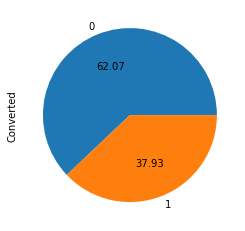

In [53]:
# checking conversion rate

round(lead_score_df['Converted'].value_counts(normalize=True)*100,2).plot.pie(autopct='%.2f');

***We can observe from the pie chart that the conversion rate is about 37.9% among customers***

- **Lead origin**

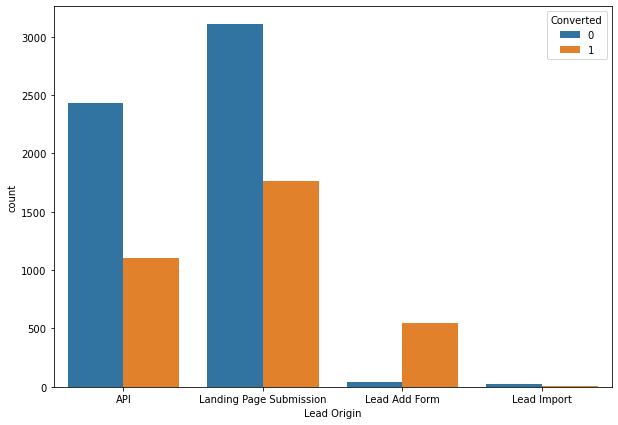

In [54]:
# plotting barplot of 'Lead Origin' w.r.t to Converted/Non-Converted customers

plt.figure(figsize=(10,7))
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_score_df)
plt.show()

***Here we can observe the following :-***
- API and Landing Page Submission have lower conversion rate but higher lead count compared to others
- Lead Add Form has high conversion rate but lower lead count
- Lead import has less lead count and conversion rate


- **Lead Source**

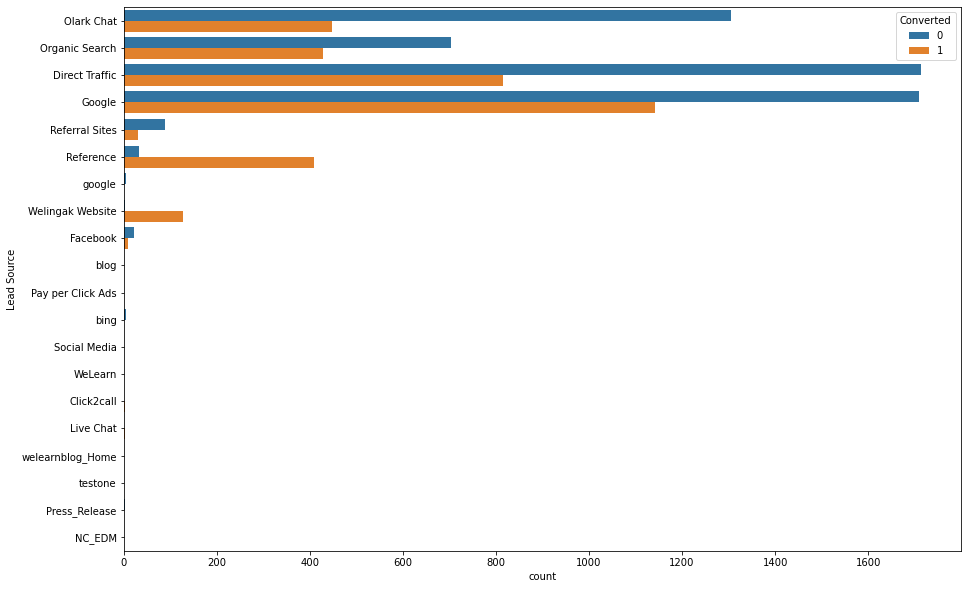

In [55]:
# plotting barplot of 'Lead Source' w.r.t to Converted/Non-Converted customers

plt.figure(figsize=(15,10))
sns.countplot(y = "Lead Source", hue = "Converted", data = lead_score_df)
plt.show()

In [56]:
# replacing 'google' with 'Google' since both are same

lead_score_df['Lead Source'] = lead_score_df['Lead Source'].replace(['google'], 'Google')

In [57]:
# checking data distribution

lead_score_df['Lead Source'].value_counts()

Google               2857
Direct Traffic       2528
Olark Chat           1753
Organic Search       1131
Reference             443
Welingak Website      129
Referral Sites        120
Facebook               31
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
WeLearn                 1
testone                 1
NC_EDM                  1
Pay per Click Ads       1
welearnblog_Home        1
blog                    1
Name: Lead Source, dtype: int64

In [58]:
# checking values with less than 10 records 

misc_vals = lead_score_df['Lead Source'].value_counts()[(lead_score_df['Lead Source'].value_counts() < 10)].index.tolist()
misc_vals

['bing',
 'Click2call',
 'Social Media',
 'Live Chat',
 'Press_Release',
 'WeLearn',
 'testone',
 'NC_EDM',
 'Pay per Click Ads',
 'welearnblog_Home',
 'blog']

In [59]:
# replacing these values with less than 10 records to 'Misc' value

lead_score_df['Lead Source'].replace(misc_vals, 'Misc', inplace=True)
lead_score_df['Lead Source'].value_counts()

Google              2857
Direct Traffic      2528
Olark Chat          1753
Organic Search      1131
Reference            443
Welingak Website     129
Referral Sites       120
Facebook              31
Misc                  22
Name: Lead Source, dtype: int64

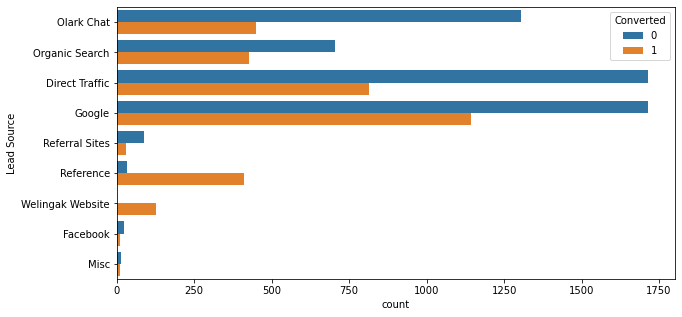

In [60]:
# plotting barplot of 'Lead Source' w.r.t to Converted/Non-Converted customers

plt.figure(figsize=(10,5))
sns.countplot(y = "Lead Source", hue = "Converted", data = lead_score_df)
plt.show()

***Here we can observe the following :-***
- Direct traffic and Google shows higher lead counts whereas lower conversion rate
- Reference and Welingak Website shows higher conversion rate but with low lead counts


- **Do Not Email**

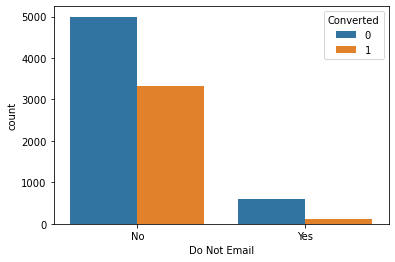

In [61]:
# plotting barplot of 'Do Not Email' w.r.t to Converted/Non-Converted customers

sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_score_df);

- **Do Not Call**

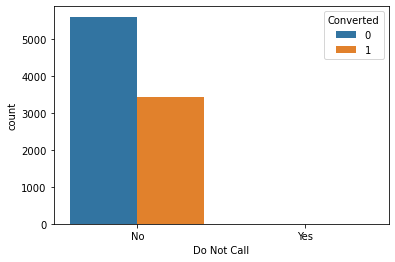

In [62]:
# plotting barplot of 'Do not Call' w.r.t to Converted/Non-Converted customers

sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_score_df);

***Here we observe that:-***
- Both Do not Call/ Do not email shows lower conversion rate for customers opted to be called/emailed about the online course. This doesnt give much insight on conversion behaviour and hence can be avoided later after analysis

- **TotalVisits**

In [63]:
# checking data spread of 'TotalVisits' column

lead_score_df['TotalVisits'].describe()

count    9014.000000
mean        3.455181
std         4.866342
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

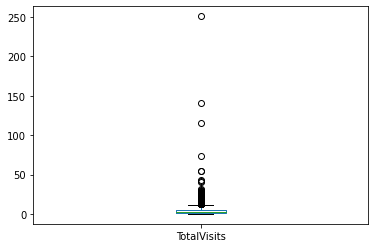

In [64]:
# plotting boxplot to visualise data spread

lead_score_df['TotalVisits'].plot.box();

In [65]:
# checking 5th percentile value

quantile_05 = lead_score_df['TotalVisits'].quantile(0.05)
quantile_05

0.0

In [66]:
# checking 95th percentile value

quantile_95 = lead_score_df['TotalVisits'].quantile(0.95)
quantile_95

10.0

In [67]:
# checking count of outlier values beyond 95th percentile

len(lead_score_df[lead_score_df['TotalVisits']>quantile_95])

351

In [68]:
# capping these outliers b/w 5th and 95th percentile

lead_score_df['TotalVisits'][lead_score_df['TotalVisits'] <= quantile_05] = quantile_05
lead_score_df['TotalVisits'][lead_score_df['TotalVisits'] >= quantile_95] = quantile_95

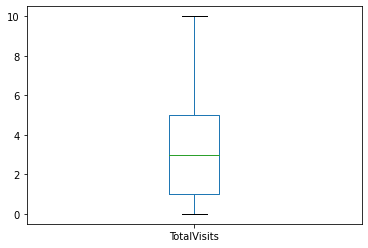

In [69]:
# plotting boxplot to visualise data spread

lead_score_df['TotalVisits'].plot.box();

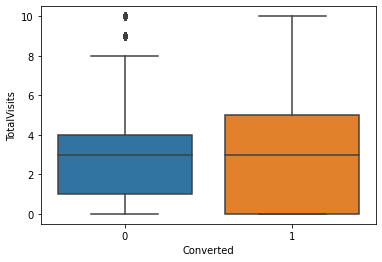

In [70]:
# plotting boxplot to visualise data spread w.r.t to Converted/non-Converted customers

sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_score_df);

***Here we observe that***
- Eventhough both converted/non-converted leads from TotalVisits show same median there is a wider boxplot for converted leads which might indicate that higher the frequency of visit then more likely the chance of conversion

- **Total Time Spent on Website**

In [71]:
# checking data spread of 'Total Time Spent on Website' column

lead_score_df['Total Time Spent on Website'].describe()

count    9014.000000
mean      482.786665
std       545.592915
min         0.000000
25%         9.250000
50%       246.000000
75%       924.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

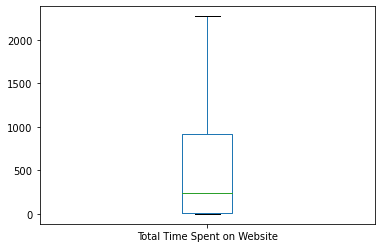

In [72]:
# plotting boxplot to visualise data spread

lead_score_df['Total Time Spent on Website'].plot.box();

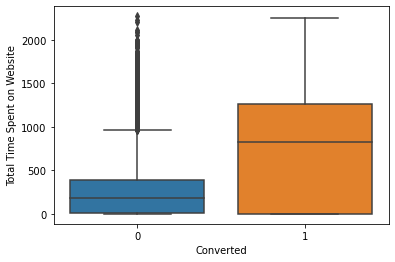

In [73]:
# plotting boxplot to visualise data spread w.r.t to Converted/non-Converted customers

sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_score_df);

***Here we observe that :-***
- The leads which were converted shows higher median than those that were converted and also a wider boxplot. This indicates that the more the time spent on Website the more likely the lead gets converted

- **Page Views Per Visit**

In [74]:
# checking data spread of 'Page Views Per Visit' column

lead_score_df['Page Views Per Visit'].describe()

count    9014.000000
mean        2.367515
std         2.151759
min         0.000000
25%         1.000000
50%         2.000000
75%         3.250000
max        55.000000
Name: Page Views Per Visit, dtype: float64

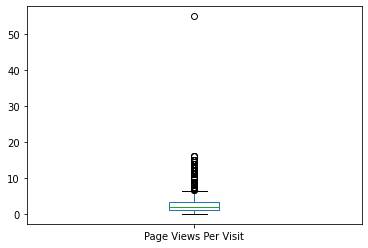

In [75]:
# plotting boxplot to visualise data spread

lead_score_df['Page Views Per Visit'].plot.box();

In [76]:
# checking 5th percentile value

quantile_05 = lead_score_df['Page Views Per Visit'].quantile(0.05)
quantile_05

0.0

In [77]:
# checking 95th percentile value

quantile_95 = lead_score_df['Page Views Per Visit'].quantile(0.95)
quantile_95

6.0

In [78]:
# checking count of outlier values beyond 95th percentile

len(lead_score_df[lead_score_df['Page Views Per Visit']>quantile_95])

355

In [79]:
# capping these outliers b/w 5th and 95th percentile

lead_score_df['Page Views Per Visit'][lead_score_df['Page Views Per Visit'] <= quantile_05] = quantile_05
lead_score_df['Page Views Per Visit'][lead_score_df['Page Views Per Visit'] >= quantile_95] = quantile_95

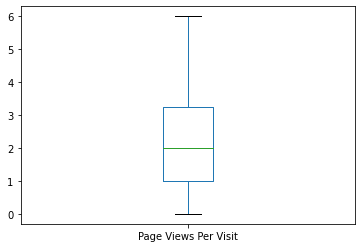

In [80]:
# plotting boxplot to visualise data spread

lead_score_df['Page Views Per Visit'].plot.box();

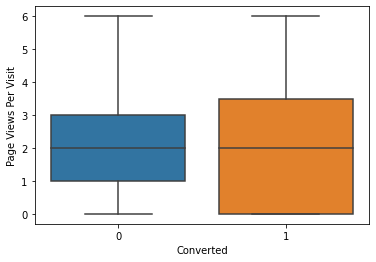

In [81]:
# plotting boxplot to visualise data spread w.r.t to Converted/non-Converted customers

sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_score_df);

***Here we observe that :-***
- The boxplots and median for both converted/non-converted leads are similar and hence not much insight can be derived

- **Last Activity**

In [82]:
# checking data distribution

lead_score_df['Last Activity'].value_counts()

Email Opened                    3417
SMS Sent                        2701
Olark Chat Conversation          963
Page Visited on Website          637
Converted to Lead                422
Email Bounced                    304
Email Link Clicked               266
Form Submitted on Website        115
Unreachable                       89
Unsubscribed                      58
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

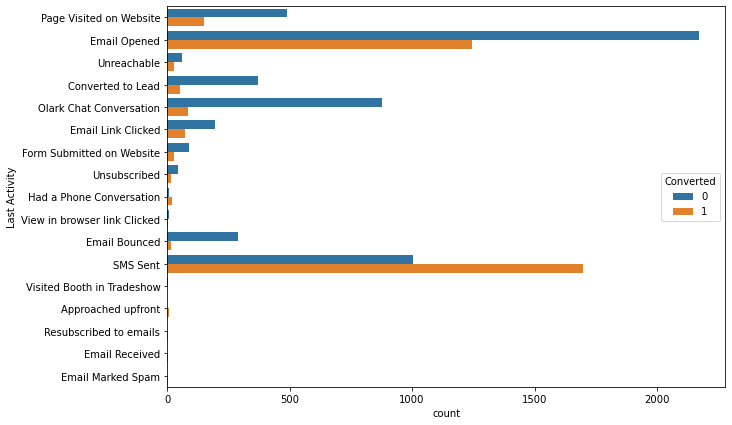

In [83]:
# plotting barplot of 'Last Activity' w.r.t Converted/non-Converted customers

plt.figure(figsize = (10,7))
sns.countplot(y = "Last Activity", hue = "Converted", data = lead_score_df);

In [84]:
# checking values with less than 50 records 

misc_vals = lead_score_df['Last Activity'].value_counts()[(lead_score_df['Last Activity'].value_counts() < 50)].index.tolist()
misc_vals

['Had a Phone Conversation',
 'View in browser link Clicked',
 'Approached upfront',
 'Email Received',
 'Email Marked Spam',
 'Visited Booth in Tradeshow',
 'Resubscribed to emails']

In [85]:
# replacing these values with less than 50 records to 'Misc' value

lead_score_df['Last Activity'].replace(misc_vals, 'Misc', inplace=True)
lead_score_df['Last Activity'].value_counts()

Email Opened                 3417
SMS Sent                     2701
Olark Chat Conversation       963
Page Visited on Website       637
Converted to Lead             422
Email Bounced                 304
Email Link Clicked            266
Form Submitted on Website     115
Unreachable                    89
Unsubscribed                   58
Misc                           42
Name: Last Activity, dtype: int64

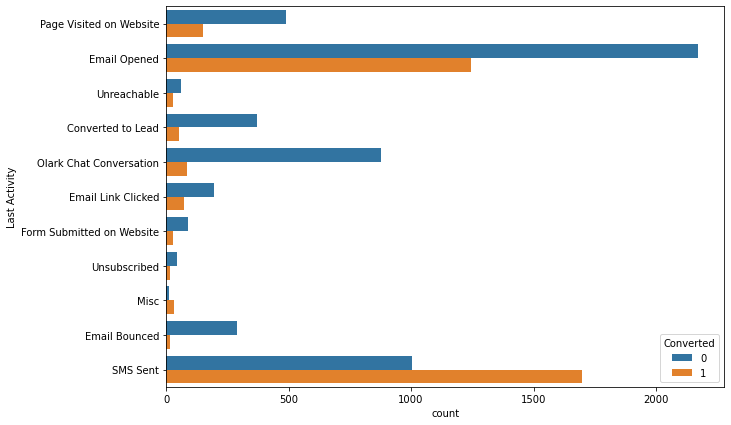

In [86]:
# plotting barplot of 'Last Activity' w.r.t Converted/non-Converted customers

plt.figure(figsize=(10,7))
sns.countplot(y = "Last Activity", hue = "Converted", data = lead_score_df)
plt.show()

***Here we observe that :-***
- Email Opened and Olark Chat Conversation has higher lead counts but lower conversion rates
- SMS Sent has both higher conversion rate and lead counts

- **Specialization**

In [87]:
# checking data distribution

lead_score_df['Specialization'].value_counts()

Misc                                 3230
Finance Management                    959
Human Resource Management             836
Marketing Management                  822
Operations Management                 498
Business Administration               397
IT Projects Management                366
Supply Chain Management               344
Banking, Investment And Insurance     335
Media and Advertising                 202
Travel and Tourism                    202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                110
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

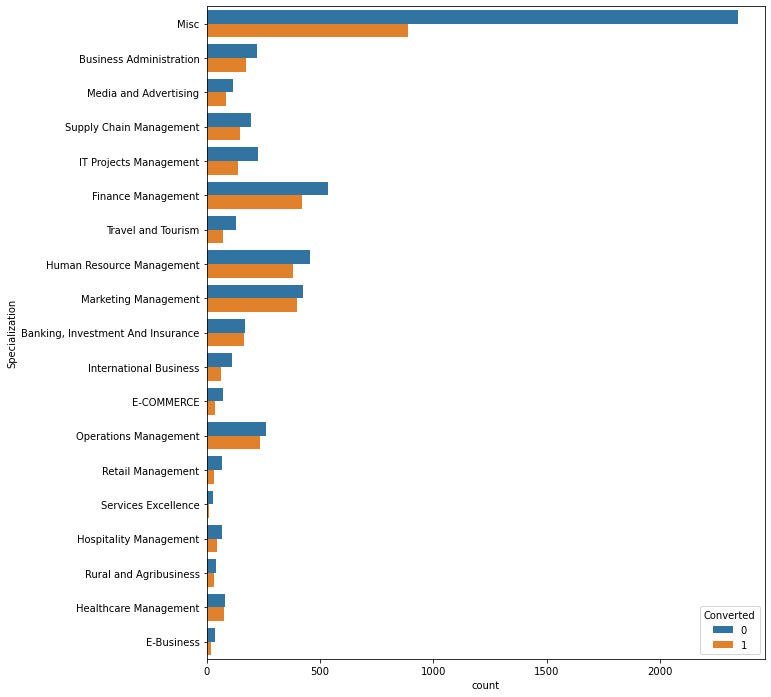

In [88]:
# plotting barplot of 'Specialization' w.r.t Converted/non-Converted customers

plt.figure(figsize=(10,12))
sns.countplot(y = "Specialization", hue = "Converted", data = lead_score_df)
plt.show()

***Here we observe that :-***
- Most leads are generated in miscellaneous Specialisation which is implies the leads were not sure on which Specialisation to go for during initial phase of interaction and also most of these comprised of Unemployed people and Students. Hence there needs to be a strategy to make these population aware of the available Specialisation and how it could benefit them to increase their conversion rate.
- HR, Marketing, Operations and Finance management shows comparatively better conversion rate compared to other Specialisations

- **What is your current occupation**

In [89]:
# checking data distribution

lead_score_df['What is your current occupation'].value_counts()

Unemployed              8101
Working Professional     675
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

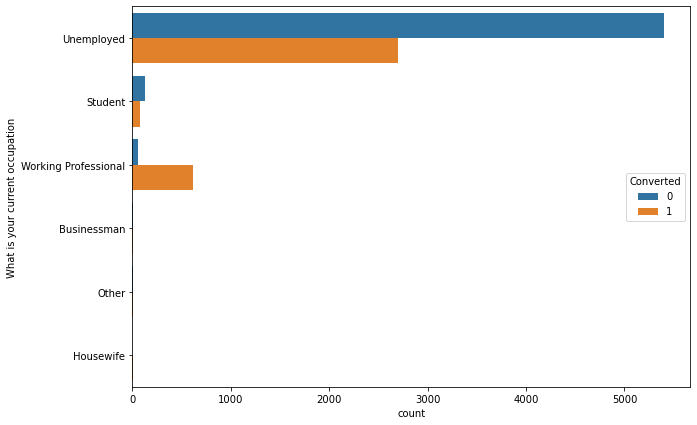

In [90]:
# plotting barplot of 'What is your current occupation' w.r.t Converted/non-Converted customers

plt.figure(figsize=(10,7))
sns.countplot(y = "What is your current occupation", hue = "Converted", data = lead_score_df)
plt.show()

***Here we observe that :-***
- Unemployed people have higher lead count but lower conversion rate
- Working Professionals have higher conversion rate but comparatively lower lead count

- **Search**

In [91]:
# checking data distribution

lead_score_df['Search'].value_counts()

No     9000
Yes      14
Name: Search, dtype: int64

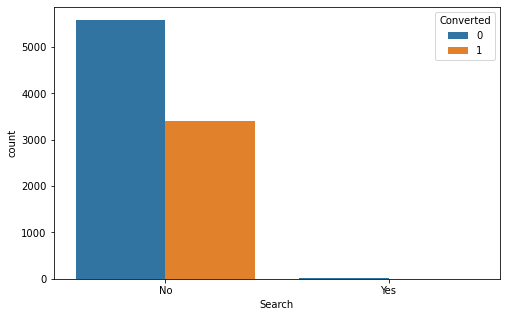

In [92]:
# plotting barplot 

plt.figure(figsize=(8,5))
sns.countplot(x = "Search", hue = "Converted", data = lead_score_df)
plt.show()

In [93]:
# checking data distribution percentage

round(lead_score_df['Search'].value_counts(normalize=True)*100,2)

No     99.84
Yes     0.16
Name: Search, dtype: float64

In [94]:
# dropping this column since there is high data skewness

lead_score_df.drop(['Search'], axis=1, inplace=True)

- **Magazine**

In [95]:
# checking data distribution

lead_score_df['Magazine'].value_counts()

No    9014
Name: Magazine, dtype: int64

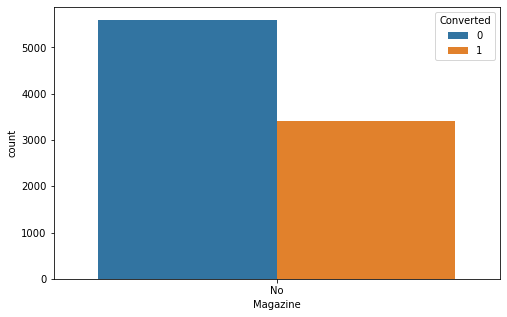

In [96]:
# plotting barplot 

plt.figure(figsize=(8,5))
sns.countplot(x = "Magazine", hue = "Converted", data = lead_score_df)
plt.show()

In [97]:
# checking data distribution percentage

round(lead_score_df['Magazine'].value_counts(normalize=True)*100,2)

No    100.0
Name: Magazine, dtype: float64

In [98]:
# dropping this column since there is high data skewness

lead_score_df.drop(['Magazine'], axis=1, inplace=True)

- **Newspaper Article**

In [99]:
# checking data distribution

lead_score_df['Newspaper Article'].value_counts()

No     9012
Yes       2
Name: Newspaper Article, dtype: int64

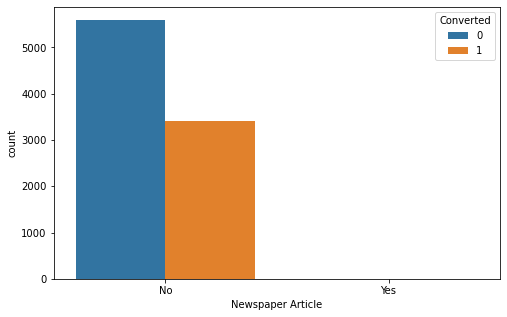

In [100]:
# plotting barplot 

plt.figure(figsize=(8,5))
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead_score_df)
plt.show()

In [101]:
# checking data distribution percentage

round(lead_score_df['Newspaper Article'].value_counts(normalize=True)*100,2)

No     99.98
Yes     0.02
Name: Newspaper Article, dtype: float64

In [102]:
# dropping this column since there is high data skewness

lead_score_df.drop(['Newspaper Article'], axis=1, inplace=True)

- **X Education Forums**

In [103]:
# checking data distribution

lead_score_df['X Education Forums'].value_counts()

No     9013
Yes       1
Name: X Education Forums, dtype: int64

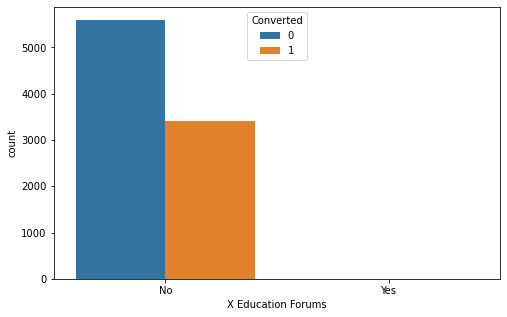

In [104]:
# plotting barplot 

plt.figure(figsize=(8,5))
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead_score_df)
plt.show()

In [105]:
# checking data distribution percentage

round(lead_score_df['X Education Forums'].value_counts(normalize=True)*100,2)

No     99.99
Yes     0.01
Name: X Education Forums, dtype: float64

In [106]:
# dropping this column since there is high data skewness

lead_score_df.drop(['X Education Forums'], axis=1, inplace=True)

- **Newspaper**

In [107]:
# checking data distribution

lead_score_df['Newspaper'].value_counts()

No     9013
Yes       1
Name: Newspaper, dtype: int64

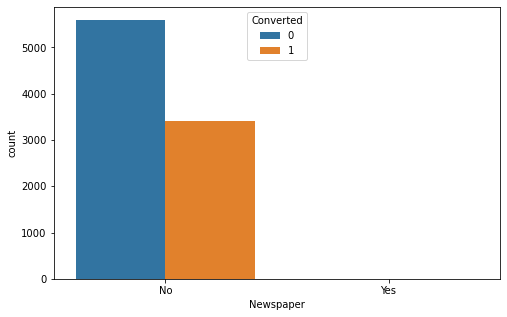

In [108]:
# plotting barplot 

plt.figure(figsize=(8,5))
sns.countplot(x = "Newspaper", hue = "Converted", data = lead_score_df)
plt.show()

In [109]:
# checking data distribution percentage

round(lead_score_df['Newspaper'].value_counts(normalize=True)*100,2)

No     99.99
Yes     0.01
Name: Newspaper, dtype: float64

In [110]:
# dropping this column since there is high data skewness

lead_score_df.drop(['Newspaper'], axis=1, inplace=True)

- **Digital Advertisement**

In [111]:
# checking data distribution

lead_score_df['Digital Advertisement'].value_counts()

No     9010
Yes       4
Name: Digital Advertisement, dtype: int64

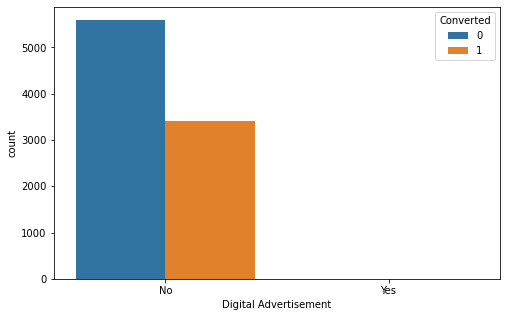

In [112]:
# plotting barplot 

plt.figure(figsize=(8,5))
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead_score_df)
plt.show()

In [113]:
# checking data distribution percentage

round(lead_score_df['Digital Advertisement'].value_counts(normalize=True)*100,2)

No     99.96
Yes     0.04
Name: Digital Advertisement, dtype: float64

In [114]:
# dropping this column since there is high data skewness

lead_score_df.drop(['Digital Advertisement'], axis=1, inplace=True)

- **Through Recommendations**

In [115]:
# checking data distribution

lead_score_df['Through Recommendations'].value_counts()

No     9007
Yes       7
Name: Through Recommendations, dtype: int64

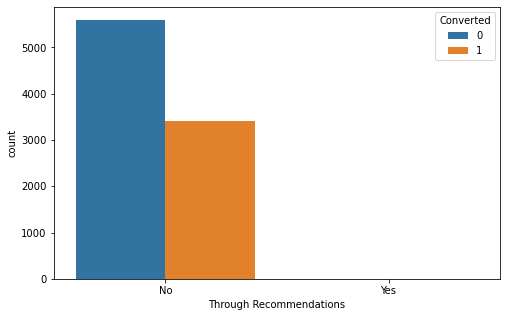

In [116]:
# plotting barplot 

plt.figure(figsize=(8,5))
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead_score_df)
plt.show()

In [117]:
# checking data distribution percentage

round(lead_score_df['Through Recommendations'].value_counts(normalize=True)*100,2)

No     99.92
Yes     0.08
Name: Through Recommendations, dtype: float64

In [118]:
# dropping this column since there is high data skewness

lead_score_df.drop(['Through Recommendations'], axis=1, inplace=True)

- **Receive More Updates About Our Courses**

In [119]:
# checking data distribution

lead_score_df['Receive More Updates About Our Courses'].value_counts()

No    9014
Name: Receive More Updates About Our Courses, dtype: int64

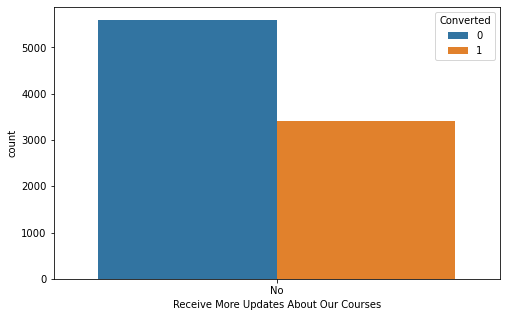

In [120]:
# plotting barplot 

plt.figure(figsize=(8,5))
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead_score_df)
plt.show()

In [121]:
# checking data distribution percentage

round(lead_score_df['Receive More Updates About Our Courses'].value_counts(normalize=True)*100,2)

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64

In [122]:
# dropping this column since there is high data skewness

lead_score_df.drop(['Receive More Updates About Our Courses'], axis=1, inplace=True)

- **Tags**

In [123]:
# checking data distribution

lead_score_df['Tags'].value_counts()

Will revert after reading the email                  5305
Ringing                                              1180
Interested in other courses                           503
Already a student                                     462
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  184
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                109
invalid number                                         82
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    23
in touch with EINS                                     12
Lost to Others

In [124]:
# checking data distribution percentage

round(lead_score_df['Tags'].value_counts(normalize=True)*100,2)

Will revert after reading the email                  58.85
Ringing                                              13.09
Interested in other courses                           5.58
Already a student                                     5.13
Closed by Horizzon                                    3.34
switched off                                          2.66
Busy                                                  2.04
Lost to EINS                                          1.91
Not doing further education                           1.61
Interested  in full time MBA                          1.29
Graduation in progress                                1.21
invalid number                                        0.91
Diploma holder (Not Eligible)                         0.70
wrong number given                                    0.52
opp hangup                                            0.37
number not provided                                   0.26
in touch with EINS                                    0.

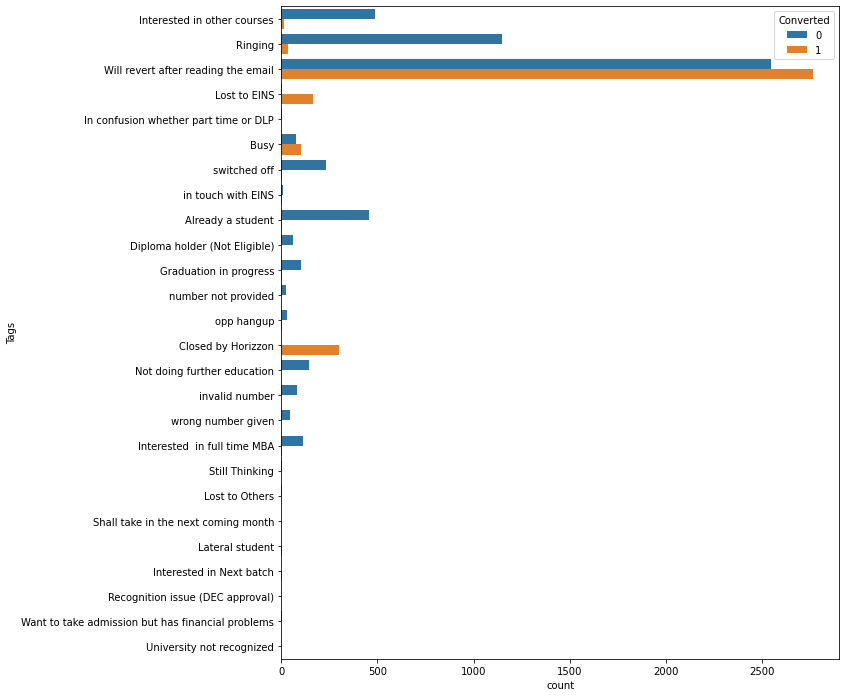

In [125]:
# plotting barplot

plt.figure(figsize=(10,12))
sns.countplot(y = "Tags", hue = "Converted", data = lead_score_df)
plt.show()

In [126]:
# checking values with less than 20 records 

misc_vals = lead_score_df['Tags'].value_counts()[(lead_score_df['Tags'].value_counts() < 20)].index.tolist()
misc_vals

['in touch with EINS',
 'Lost to Others',
 'Want to take admission but has financial problems',
 'Still Thinking',
 'In confusion whether part time or DLP',
 'Interested in Next batch',
 'Lateral student',
 'University not recognized',
 'Shall take in the next coming month',
 'Recognition issue (DEC approval)']

In [127]:
# replacing values with less than 20 records with 'Misc' value

lead_score_df['Tags'].replace(misc_vals, 'Misc', inplace=True)
lead_score_df['Tags'].value_counts()

Will revert after reading the email    5305
Ringing                                1180
Interested in other courses             503
Already a student                       462
Closed by Horizzon                      301
switched off                            240
Busy                                    184
Lost to EINS                            172
Not doing further education             145
Interested  in full time MBA            116
Graduation in progress                  109
invalid number                           82
Diploma holder (Not Eligible)            63
Misc                                     49
wrong number given                       47
opp hangup                               33
number not provided                      23
Name: Tags, dtype: int64

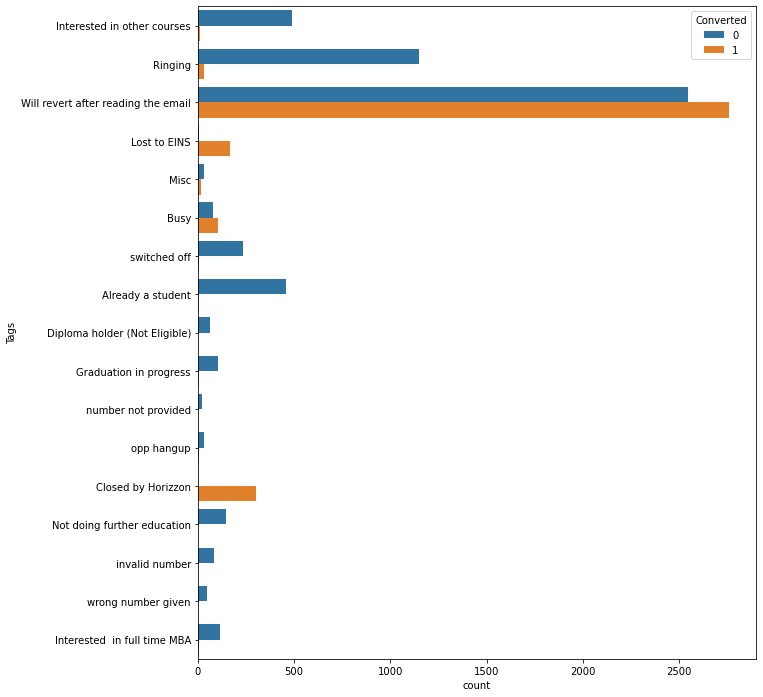

In [128]:
# plotting barplot

plt.figure(figsize=(10,12))
sns.countplot(y = "Tags", hue = "Converted", data = lead_score_df)
plt.show()

***Here we observe that :-***
- Leads with 'Will revert after reading the email' status have higher conversion rate and lead count
- Leads with 'Closed by Horizon' & 'Lost to EINS' status show better conversion rate but very low lead count

- **Lead Quality**

In [129]:
# checking data distribution

lead_score_df['Lead Quality'].value_counts()

Not Sure             5756
Might be             1515
Worst                 596
High in Relevance     592
Low in Relevance      555
Name: Lead Quality, dtype: int64

In [130]:
# checking data distribution percentage

round(lead_score_df['Lead Quality'].value_counts(normalize=True)*100,2)

Not Sure             63.86
Might be             16.81
Worst                 6.61
High in Relevance     6.57
Low in Relevance      6.16
Name: Lead Quality, dtype: float64

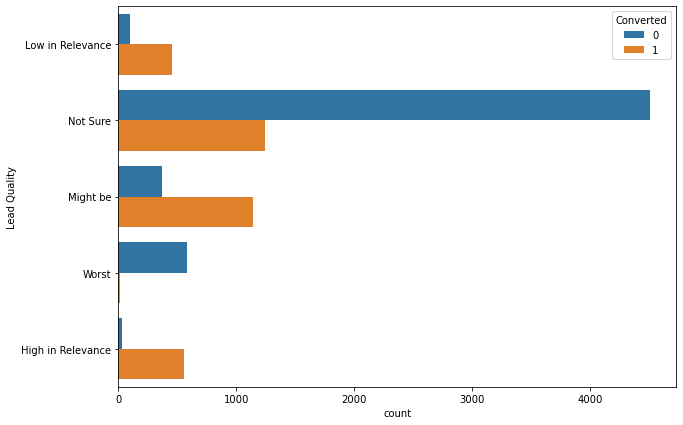

In [131]:
#plotting barplot

plt.figure(figsize=(10,7))
sns.countplot(y = "Lead Quality", hue = "Converted", data = lead_score_df)
plt.show()

***Here we observe that :-***
- Leads with 'Not Sure' status assigned are having higher lead count but low conversions
- Leads tagged with 'High relevance' & 'Might be' have better conversions

- **Update me on Supply Chain Content**

In [132]:
# checking data distribution

lead_score_df['Update me on Supply Chain Content'].value_counts()

No    9014
Name: Update me on Supply Chain Content, dtype: int64

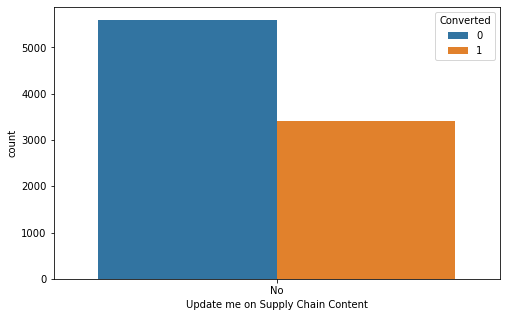

In [133]:
#plotting barplot

plt.figure(figsize=(8,5))
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = lead_score_df)
plt.show()

In [134]:
# checking data distribution percentage

round(lead_score_df['Update me on Supply Chain Content'].value_counts(normalize=True)*100,2)

No    100.0
Name: Update me on Supply Chain Content, dtype: float64

In [135]:
# dropping due to high data skewness

lead_score_df.drop(['Update me on Supply Chain Content'], axis=1, inplace=True)

- **Get updates on DM Content**

In [136]:
# checking data distribution

lead_score_df['Get updates on DM Content'].value_counts()

No    9014
Name: Get updates on DM Content, dtype: int64

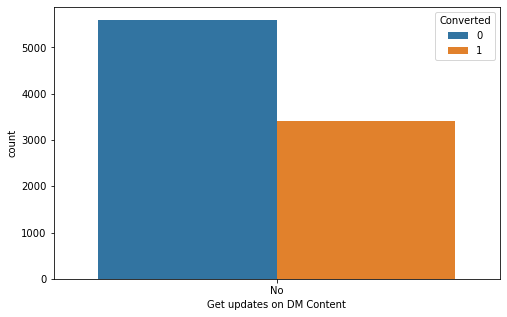

In [137]:
#plotting barplot

plt.figure(figsize=(8,5))
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead_score_df)
plt.show()

In [138]:
# checking data distribution percentage

round(lead_score_df['Get updates on DM Content'].value_counts(normalize=True)*100,2)

No    100.0
Name: Get updates on DM Content, dtype: float64

In [139]:
# dropping due to high data skewness

lead_score_df.drop(['Get updates on DM Content'], axis=1, inplace=True)

- **City**

In [140]:
# checking data distribution

lead_score_df['City'].value_counts()

Mumbai                         6692
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

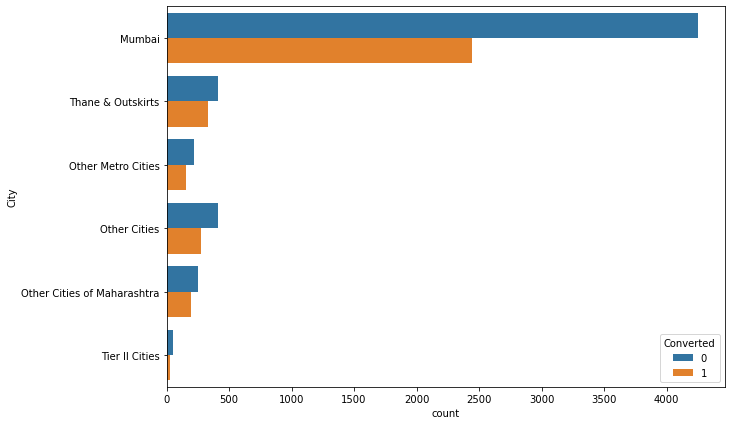

In [141]:
#plotting barplot

plt.figure(figsize=(10,7))
sns.countplot(y = "City", hue = "Converted", data = lead_score_df)
plt.show()

***Here we observe :-***
- 'Mumbai' has highest lead counts but lower conversion rate

- **I agree to pay the amount through cheque**

In [142]:
# checking data distribution

lead_score_df['I agree to pay the amount through cheque'].value_counts()

No    9014
Name: I agree to pay the amount through cheque, dtype: int64

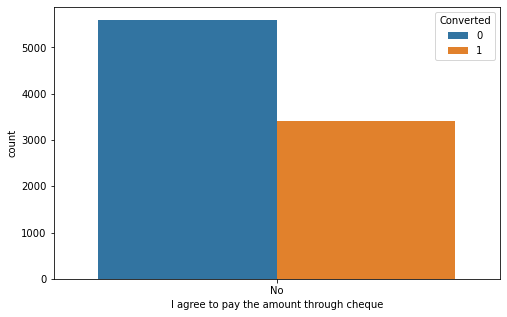

In [143]:
#plotting barplot

plt.figure(figsize=(8,5))
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lead_score_df)
plt.show()

In [144]:
# checking data distribution percentage

round(lead_score_df['I agree to pay the amount through cheque'].value_counts(normalize=True)*100,2)

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64

In [145]:
# dropping due to high data skewness

lead_score_df.drop(['I agree to pay the amount through cheque'], axis=1, inplace=True)

- **A free copy of Mastering The Interview**

In [146]:
# checking data distribution

lead_score_df['A free copy of Mastering The Interview'].value_counts()

No     6126
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

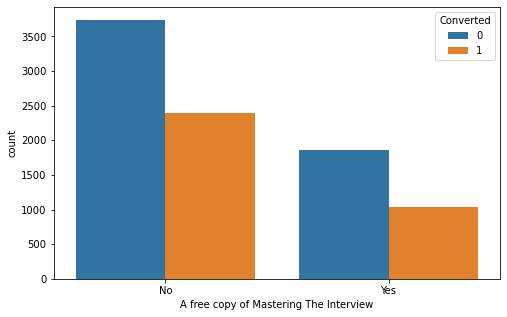

In [147]:
#plotting barplot

plt.figure(figsize=(8,5))
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead_score_df)
plt.show()

In [148]:
# checking data distribution percentage

round(lead_score_df['A free copy of Mastering The Interview'].value_counts(normalize=True)*100,2)

No     67.96
Yes    32.04
Name: A free copy of Mastering The Interview, dtype: float64

- **Last Notable Activity**

In [149]:
# checking data distribution

lead_score_df['Last Notable Activity'].value_counts()

Modified                        3237
Email Opened                    2810
SMS Sent                        2140
Page Visited on Website          317
Olark Chat Conversation          182
Email Link Clicked               172
Email Bounced                     59
Unsubscribed                      44
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
Approached upfront                 1
Email Received                     1
View in browser link Clicked       1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

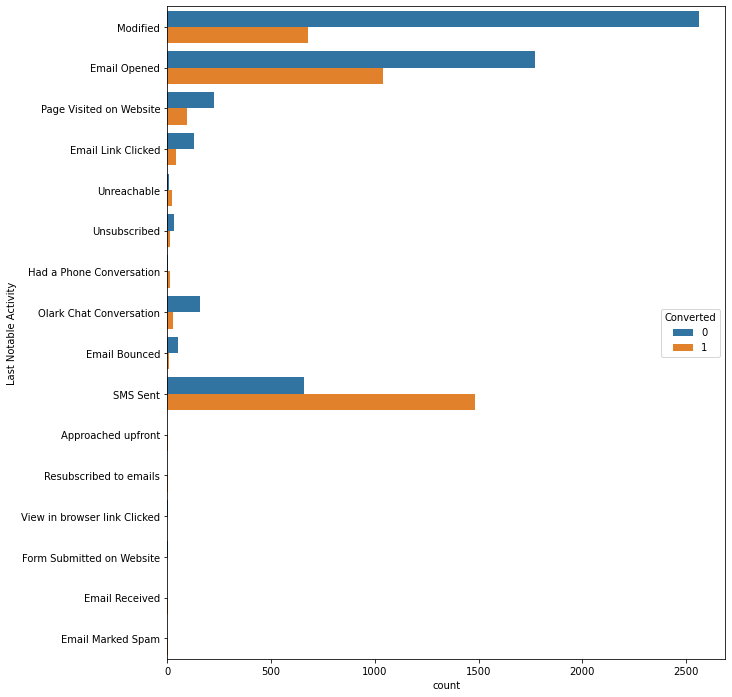

In [150]:
#plotting barplot

plt.figure(figsize=(10,12))
sns.countplot(y = "Last Notable Activity", hue = "Converted", data = lead_score_df)
plt.show()

In [151]:
# checking data distribution percentage

round(lead_score_df['Last Notable Activity'].value_counts(normalize=True)*100,2)

Modified                        35.91
Email Opened                    31.17
SMS Sent                        23.74
Page Visited on Website          3.52
Olark Chat Conversation          2.02
Email Link Clicked               1.91
Email Bounced                    0.65
Unsubscribed                     0.49
Unreachable                      0.36
Had a Phone Conversation         0.16
Email Marked Spam                0.02
Form Submitted on Website        0.01
Approached upfront               0.01
Email Received                   0.01
View in browser link Clicked     0.01
Resubscribed to emails           0.01
Name: Last Notable Activity, dtype: float64

In [152]:
# checking values with less than 20 records 

misc_vals = lead_score_df['Last Notable Activity'].value_counts()[(lead_score_df['Last Notable Activity'].value_counts() < 20)].index.tolist()
misc_vals

['Had a Phone Conversation',
 'Email Marked Spam',
 'Form Submitted on Website',
 'Approached upfront',
 'Email Received',
 'View in browser link Clicked',
 'Resubscribed to emails']

In [153]:
# replacing values with less than 20 records with 'Misc'

lead_score_df['Last Notable Activity'].replace(misc_vals, 'Misc', inplace=True)
lead_score_df['Last Notable Activity'].value_counts()

Modified                   3237
Email Opened               2810
SMS Sent                   2140
Page Visited on Website     317
Olark Chat Conversation     182
Email Link Clicked          172
Email Bounced                59
Unsubscribed                 44
Unreachable                  32
Misc                         21
Name: Last Notable Activity, dtype: int64

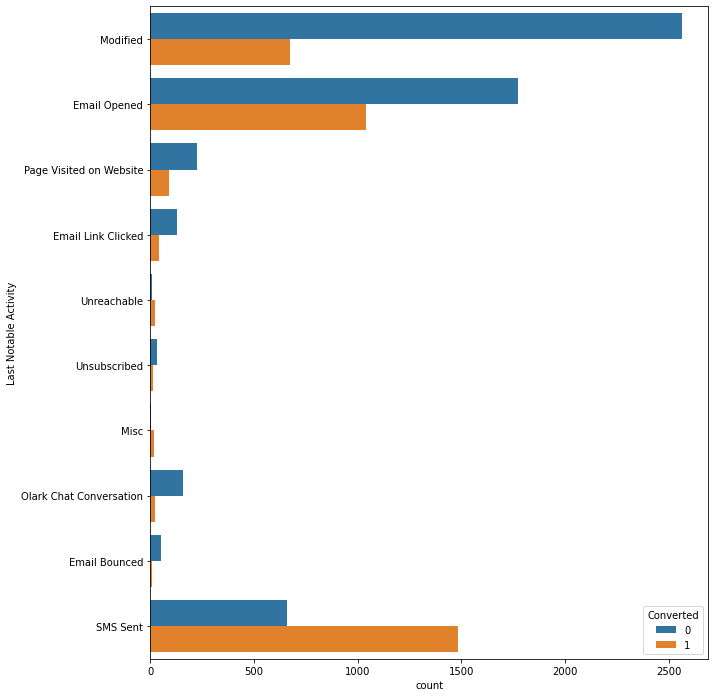

In [154]:
# plotting barplot

plt.figure(figsize=(10,12))
sns.countplot(y = "Last Notable Activity", hue = "Converted", data = lead_score_df)
plt.show()

***Here we observe that:-***
- Leads with last notable activity as 'SMS Sent' have higher conversions

In [155]:
# inspecting data head

lead_score_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Misc,Unemployed,Interested in other courses,Low in Relevance,Mumbai,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Misc,Unemployed,Ringing,Not Sure,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Misc,Unemployed,Will revert after reading the email,Might be,Mumbai,No,Modified


In [156]:
# dropping variables like 'Tags', 'Lead Quality', 'Last Activity' & 'Last Notable Activity' since these are done by Sales team
# after procuring form data from customers

# Hence these need to be avoided in analysis and only focus on customer data procured from customer activity

lead_score_df.drop(['Tags', 'Lead Quality', 'Last Activity', 'Last Notable Activity'], axis=1, inplace=True)
lead_score_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,Misc,Unemployed,Mumbai,No
1,API,Organic Search,No,No,0,5.0,674,2.5,Misc,Unemployed,Mumbai,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Business Administration,Student,Mumbai,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Misc,Unemployed,Mumbai,No


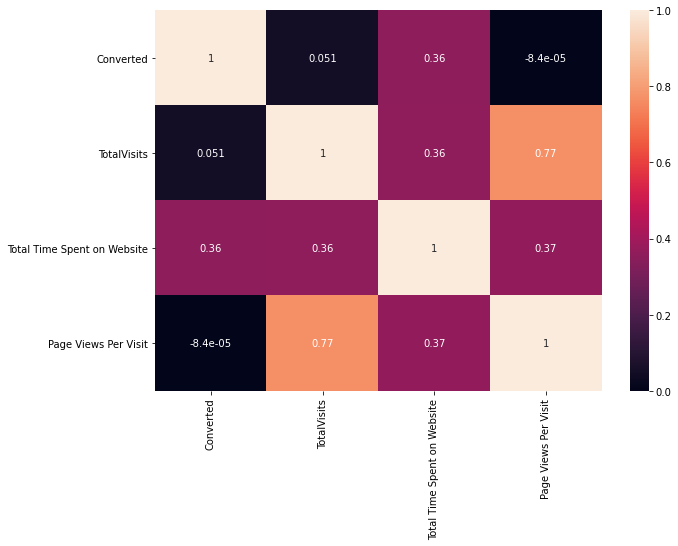

In [157]:
# checking correlation of numerical variables

plt.figure(figsize=(10,7))
sns.heatmap(lead_score_df.corr(), annot=True)
plt.show()

***TotalVisits and Page Views Per Visit show higher correlation hence these needs to be evaluated using RFE and VIF values***

### Data transformation

In [158]:
# mapping 'Yes/No' values to 1/0

var_names =  ['Do Not Email', 'Do Not Call', 'A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead_score_df[var_names] = lead_score_df[var_names].apply(binary_map)

In [159]:
# checking data head

lead_score_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0,0.0,0,0.0,Misc,Unemployed,Mumbai,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Misc,Unemployed,Mumbai,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Business Administration,Student,Mumbai,1
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Misc,Unemployed,Mumbai,0


In [160]:
# creating dummy variables for categorical columns 

dummy_vars = pd.get_dummies(lead_score_df[['Lead Origin', 'Lead Source', 'Specialization',
                                           'What is your current occupation','City']], drop_first=True)
dummy_vars.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Misc,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Misc,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [161]:
# concatenating dummy variable to dataframe

lead_score_df = pd.concat([lead_score_df, dummy_vars], axis=1)
lead_score_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Misc,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Misc,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,API,Olark Chat,0,0,0,0.0,0,0.0,Misc,Unemployed,Mumbai,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Misc,Unemployed,Mumbai,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Business Administration,Student,Mumbai,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Misc,Unemployed,Mumbai,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [162]:
# dropping columns after adding dummy variables

lead_score_df.drop(['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation','City'], axis = 1, inplace=True)

In [163]:
# checking data head

lead_score_df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Misc,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Misc,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### Train-Test Splitting

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
# storing independant variables

X = lead_score_df.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Misc,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Misc,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [166]:
# storing dependant variable

y = lead_score_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [167]:
# performing train_test split on dataframe with 70% as train and 30% as test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [168]:
from sklearn.preprocessing import StandardScaler

In [169]:
# performing standard scaling on data

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Misc,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Misc,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
4948,0,0,-0.070265,0.554751,-0.704224,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5938,0,0,-1.146235,-0.890188,-1.261387,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5688,0,0,-1.146235,-0.890188,-1.261387,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5381,1,0,1.364363,-0.415867,0.036802,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4742,0,0,-0.070265,1.126134,0.410102,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### Model Building

In [170]:
import statsmodels.api as sm

In [171]:
# train first logistic regression model using statsmodel

X_train_sm = sm.add_constant(X_train)
logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6309
Model:                            GLM   Df Residuals:                     6263
Model Family:                Binomial   Df Model:                           45
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2908.5
Date:                Sat, 15 May 2021   Deviance:                       5817.1
Time:                        19:09:02   Pearson chi2:                 6.65e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6913      1.315      0.526      0.599      -1.887       3.269
Do Not Email                                            -1.5221      0.171     -8.892      0.000      -1.858      -1.187
Do Not Call                                             20.2557   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
TotalVisits                                              0.2449      0.051      4.792      0.000       0.145       0.345
Total Time Spent on Website                              1.1020      0.039     28.320      0.000       1.026       1.178
Page Views Per Visit                                    -0.1341      0.058     -2.306      0.021      -0.248      -0.020
A free copy of Mastering The Interview                  -0.2035      0.103     -1.969      0.049      -0.406      -0.001
Lead Origin_Landing Page Submission                     -0.6904      0.129     -5.357      0.000      -0.943      -0.438
Lead Origin_Lead Add Form                                3.4143      1.342      2.543      0.011       0.783       6.045
Lead Origin_Lead Import                                 21.3908   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Facebook                                   -20.4551   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Google                                       0.1780      0.109      1.630      0.103      -0.036       0.392
Lead Source_Misc                                        -0.2053      0.823     -0.249      0.803      -1.819       1.408
Lead Source_Olark Chat                                   1.1187      0.154      7.256      0.000       0.817       1.421
Lead Source_Organic Search                               0.1578      0.127      1.246      0.213      -0.090       0.406
Lead Source_Reference                                    0.5433      1.360      0.399      0.690      -2.122       3.209
Lead Source_Referral Sites                              -0.2472      0.330     -0.750      0.453      -0.893       0.399
Lead Source_Welingak Website                             3.0606      1.525      2.007      0.045       0.071       6.050
Specialization_Business Administration                  -0.1830      0.232     -0.789      0.430      -0.637       0.271
Specialization_E-Business                               -0.4324      0.435     -0.995      0.320      -1.284       0.420
Specialization_E-COMMERCE                               -0.0212      0.343     -0.062      0.951      -0.694       0.651
Specialization_Finance Management                       -0.1752      0.198     -0.884      0.377      -0.563       0.213
Specialization_Healthcare Management                    -0

### Feature Selection Using RFE

In [172]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [173]:
from sklearn.feature_selection import RFE

# performing RFE on data for feature elimination 

rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [174]:
rfe.support_

array([ True, False, False,  True, False, False,  True,  True,  True,
       False, False, False,  True, False,  True, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False,  True,  True,  True, False, False, False, False,  True])

In [175]:
# checking columns with False value for support after RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 23),
 ('TotalVisits', False, 12),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 17),
 ('A free copy of Mastering The Interview', False, 6),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 8),
 ('Lead Source_Google', False, 19),
 ('Lead Source_Misc', False, 10),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 20),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 4),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 26),
 ('Specialization_E-Business', False, 5),
 ('Specialization_E-COMMERCE', False, 22),
 ('Specialization_Finance Management', False, 27),
 ('Specialization_Healthcare Management', False, 25),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_Human Resource Ma

In [176]:
# fetching top 15 columns after RFE

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Specialization_Hospitality Management', 'Specialization_Misc',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities'],
      dtype='object')

In [177]:
# columns to reject after RFE with low support

X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Misc', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'What is your current occupat

In [178]:
# train logistic regression model after RFE

X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6309
Model:                            GLM   Df Residuals:                     6293
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2933.5
Date:                Sat, 15 May 2021   Deviance:                       5867.0
Time:                        19:09:07   Pearson chi2:                 6.72e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3369      0.636      0.530      0.596      -0.910       1.583
Do Not Email                                            -1.5406      0.169     -9.115      0.000      -1.872      -1.209
Total Time Spent on Website                              1.1060      0.039     28.678      0.000       1.030       1.182
Lead Origin_Landing Page Submission                     -0.8569      0.120     -7.120      0.000      -1.093      -0.621
Lead Origin_Lead Add Form                                3.0227      1.147      2.636      0.008       0.775       5.270
Lead Origin_Lead Import                                  0.6843      0.484      1.413      0.158      -0.265       1.634
Lead Source_Olark Chat                                   0.8499      0.112      7.567      0.000       0.630       1.070
Lead Source_Reference                                    0.6481      1.166      0.556      0.578      -1.637       2.933
Lead Source_Welingak Website                             3.1805      1.355      2.348      0.019       0.525       5.836
Specialization_Hospitality Management                   -0.9033      0.321     -2.811      0.005      -1.533      -0.274
Specialization_Misc                                     -1.0848      0.116     -9.388      0.000      -1.311      -0.858
What is your current occupation_Housewife               20.7862   1.79e+04      0.001      0.999    -3.5e+04    3.51e+04
What is your current occupation_Student                 -0.4011      0.668     -0.601      0.548      -1.710       0.908
What is your current occupation_Unemployed              -0.5022      0.633     -0.793      0.428      -1.744       0.739
What is your current occupation_Working Professional     2.1771      0.657      3.312      0.001       0.889       3.465
City_Tier II Cities                                     -0.4575      0.401     -1.142      0.254      -1.243       0.328
========================================================================================================================
"""

***Here we can observe that 'What is your current occupation_Housewife' variable has high p-value and hence maybe removed due to statistical insignificance***

In [179]:
# dropping 'What is your current occupation_Housewife' due to high p-value

col = col.drop('What is your current occupation_Housewife')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Specialization_Hospitality Management', 'Specialization_Misc',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities'],
      dtype='object')

In [180]:
# train logistic regression model after dropping column

X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6309
Model:                            GLM   Df Residuals:                     6294
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2934.4
Date:                Sat, 15 May 2021   Deviance:                       5868.8
Time:                        19:09:07   Pearson chi2:                 6.73e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6126      0.594      1.031      0.303      -0.552       1.777
Do Not Email                                            -1.5427      0.169     -9.121      0.000      -1.874      -1.211
Total Time Spent on Website                              1.1063      0.039     28.688      0.000       1.031       1.182
Lead Origin_Landing Page Submission                     -0.8547      0.120     -7.104      0.000      -1.091      -0.619
Lead Origin_Lead Add Form                                3.0241      1.147      2.637      0.008       0.777       5.271
Lead Origin_Lead Import                                  0.6860      0.484      1.416      0.157      -0.263       1.635
Lead Source_Olark Chat                                   0.8504      0.112      7.570      0.000       0.630       1.071
Lead Source_Reference                                    0.6535      1.166      0.561      0.575      -1.632       2.939
Lead Source_Welingak Website                             3.1808      1.355      2.348      0.019       0.526       5.836
Specialization_Hospitality Management                   -0.9038      0.321     -2.813      0.005      -1.534      -0.274
Specialization_Misc                                     -1.0836      0.116     -9.379      0.000      -1.310      -0.857
What is your current occupation_Student                 -0.6787      0.627     -1.082      0.279      -1.908       0.551
What is your current occupation_Unemployed              -0.7798      0.591     -1.320      0.187      -1.938       0.378
What is your current occupation_Working Professional     1.8996      0.616      3.082      0.002       0.692       3.107
City_Tier II Cities                                     -0.4578      0.401     -1.142      0.253      -1.243       0.328
========================================================================================================================
"""

In [181]:
# checking VIF values of columns

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_sm.drop('const',1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,50.35
6,Lead Source_Reference,38.94
7,Lead Source_Welingak Website,12.32
11,What is your current occupation_Unemployed,11.57
2,Lead Origin_Landing Page Submission,7.34
9,Specialization_Misc,4.51
5,Lead Source_Olark Chat,2.29
12,What is your current occupation_Working Profes...,1.73
1,Total Time Spent on Website,1.31
10,What is your current occupation_Student,1.31


***Here we can observe that 'Lead Source_Reference' variable has high p-value, VIF score and hence maybe removed due to statistical insignificance***

In [182]:
# dropping 'Lead Source_Reference' due to high p-value

col = col.drop('Lead Source_Reference')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Specialization_Hospitality Management',
       'Specialization_Misc', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities'],
      dtype='object')

In [183]:
# train logistic regression model after dropping column

X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6309
Model:                            GLM   Df Residuals:                     6295
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2934.5
Date:                Sat, 15 May 2021   Deviance:                       5869.1
Time:                        19:09:07   Pearson chi2:                 6.73e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6135      0.594      1.033      0.302      -0.551       1.778
Do Not Email                                            -1.5420      0.169     -9.119      0.000      -1.873      -1.211
Total Time Spent on Website                              1.1062      0.039     28.684      0.000       1.031       1.182
Lead Origin_Landing Page Submission                     -0.8549      0.120     -7.106      0.000      -1.091      -0.619
Lead Origin_Lead Add Form                                3.6569      0.239     15.305      0.000       3.189       4.125
Lead Origin_Lead Import                                  0.6857      0.484      1.416      0.157      -0.264       1.635
Lead Source_Olark Chat                                   0.8499      0.112      7.565      0.000       0.630       1.070
Lead Source_Welingak Website                             2.5475      0.758      3.361      0.001       1.062       4.033
Specialization_Hospitality Management                   -0.9027      0.321     -2.810      0.005      -1.532      -0.273
Specialization_Misc                                     -1.0836      0.116     -9.379      0.000      -1.310      -0.857
What is your current occupation_Student                 -0.6788      0.627     -1.082      0.279      -1.908       0.550
What is your current occupation_Unemployed              -0.7805      0.591     -1.322      0.186      -1.938       0.377
What is your current occupation_Working Professional     1.8992      0.616      3.082      0.002       0.692       3.107
City_Tier II Cities                                     -0.4578      0.401     -1.143      0.253      -1.243       0.328
========================================================================================================================
"""

In [184]:
# checking VIF values of columns

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_sm.drop('const',1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,11.57
2,Lead Origin_Landing Page Submission,7.34
8,Specialization_Misc,4.51
5,Lead Source_Olark Chat,2.29
3,Lead Origin_Lead Add Form,1.94
11,What is your current occupation_Working Profes...,1.72
6,Lead Source_Welingak Website,1.36
1,Total Time Spent on Website,1.31
9,What is your current occupation_Student,1.31
0,Do Not Email,1.12


***Here we can observe that 'What is your current occupation_Student' variable has high p-value and hence maybe removed due to statistical insignificance***

In [185]:
# dropping 'What is your current occupation_Student' due to high p-value

col = col.drop('What is your current occupation_Student')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Specialization_Hospitality Management',
       'Specialization_Misc', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities'],
      dtype='object')

In [186]:
# train logistic regression model after dropping column

X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6309
Model:                            GLM   Df Residuals:                     6296
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2935.1
Date:                Sat, 15 May 2021   Deviance:                       5870.3
Time:                        19:09:07   Pearson chi2:                 6.73e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0251      0.226      0.112      0.911      -0.417       0.467
Do Not Email                                            -1.5397      0.169     -9.118      0.000      -1.871      -1.209
Total Time Spent on Website                              1.1072      0.039     28.717      0.000       1.032       1.183
Lead Origin_Landing Page Submission                     -0.8626      0.120     -7.184      0.000      -1.098      -0.627
Lead Origin_Lead Add Form                                3.6562      0.239     15.303      0.000       3.188       4.125
Lead Origin_Lead Import                                  0.6826      0.485      1.409      0.159      -0.267       1.632
Lead Source_Olark Chat                                   0.8489      0.112      7.556      0.000       0.629       1.069
Lead Source_Welingak Website                             2.5478      0.758      3.361      0.001       1.062       4.033
Specialization_Hospitality Management                   -0.9075      0.321     -2.825      0.005      -1.537      -0.278
Specialization_Misc                                     -1.0911      0.115     -9.461      0.000      -1.317      -0.865
What is your current occupation_Unemployed              -0.1851      0.200     -0.924      0.355      -0.578       0.207
What is your current occupation_Working Professional     2.4944      0.267      9.346      0.000       1.971       3.017
City_Tier II Cities                                     -0.4579      0.401     -1.143      0.253      -1.243       0.328
========================================================================================================================
"""

In [187]:
# checking VIF values of columns

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_sm.drop('const',1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,9.12
2,Lead Origin_Landing Page Submission,5.80
8,Specialization_Misc,3.85
5,Lead Source_Olark Chat,2.19
3,Lead Origin_Lead Add Form,1.80
10,What is your current occupation_Working Profes...,1.57
6,Lead Source_Welingak Website,1.35
1,Total Time Spent on Website,1.30
0,Do Not Email,1.12
4,Lead Origin_Lead Import,1.03


***Here we can observe that 'What is your current occupation_Unemployed' variable has high p-value, VIF score and hence maybe removed due to statistical insignificance***

In [188]:
# dropping 'What is your current occupation_Unemployed' due to high p-value

col = col.drop('What is your current occupation_Unemployed')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Specialization_Hospitality Management',
       'Specialization_Misc',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities'],
      dtype='object')

In [189]:
# train logistic regression model after dropping column

X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6309
Model:                            GLM   Df Residuals:                     6297
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2935.6
Date:                Sat, 15 May 2021   Deviance:                       5871.1
Time:                        19:09:08   Pearson chi2:                 6.73e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1537      0.115     -1.333      0.183      -0.380       0.072
Do Not Email                                            -1.5396      0.169     -9.118      0.000      -1.871      -1.209
Total Time Spent on Website                              1.1075      0.039     28.720      0.000       1.032       1.183
Lead Origin_Landing Page Submission                     -0.8639      0.120     -7.195      0.000      -1.099      -0.629
Lead Origin_Lead Add Form                                3.6602      0.239     15.327      0.000       3.192       4.128
Lead Origin_Lead Import                                  0.6779      0.485      1.399      0.162      -0.272       1.628
Lead Source_Olark Chat                                   0.8516      0.112      7.582      0.000       0.631       1.072
Lead Source_Welingak Website                             2.5423      0.758      3.355      0.001       1.057       4.028
Specialization_Hospitality Management                   -0.9042      0.321     -2.814      0.005      -1.534      -0.274
Specialization_Misc                                     -1.0941      0.115     -9.488      0.000      -1.320      -0.868
What is your current occupation_Working Professional     2.6741      0.183     14.616      0.000       2.315       3.033
City_Tier II Cities                                     -0.4627      0.401     -1.155      0.248      -1.248       0.323
========================================================================================================================
"""

In [190]:
# checking VIF values of columns

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_sm.drop('const',1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Source_Olark Chat,1.93
8,Specialization_Misc,1.85
3,Lead Origin_Lead Add Form,1.49
6,Lead Source_Welingak Website,1.34
1,Total Time Spent on Website,1.28
2,Lead Origin_Landing Page Submission,1.21
9,What is your current occupation_Working Profes...,1.16
0,Do Not Email,1.11
7,Specialization_Hospitality Management,1.02
10,City_Tier II Cities,1.02


***Here we can observe that 'City_Tier II Cities' variable has high p-value and hence maybe removed due to statistical insignificance***

In [191]:
# dropping 'City_Tier II Cities' due to high p-value

col = col.drop('City_Tier II Cities')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Specialization_Hospitality Management',
       'Specialization_Misc',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [192]:
# train logistic regression model after dropping column

X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6309
Model:                            GLM   Df Residuals:                     6298
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2936.3
Date:                Sat, 15 May 2021   Deviance:                       5872.5
Time:                        19:09:08   Pearson chi2:                 6.74e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1535      0.115     -1.331      0.183      -0.380       0.072
Do Not Email                                            -1.5457      0.169     -9.155      0.000      -1.877      -1.215
Total Time Spent on Website                              1.1068      0.039     28.721      0.000       1.031       1.182
Lead Origin_Landing Page Submission                     -0.8691      0.120     -7.243      0.000      -1.104      -0.634
Lead Origin_Lead Add Form                                3.6597      0.239     15.324      0.000       3.192       4.128
Lead Origin_Lead Import                                  0.6773      0.485      1.398      0.162      -0.272       1.627
Lead Source_Olark Chat                                   0.8507      0.112      7.575      0.000       0.631       1.071
Lead Source_Welingak Website                             2.5438      0.758      3.356      0.001       1.058       4.029
Specialization_Hospitality Management                   -0.9113      0.321     -2.841      0.005      -1.540      -0.283
Specialization_Misc                                     -1.0937      0.115     -9.484      0.000      -1.320      -0.868
What is your current occupation_Working Professional     2.6713      0.183     14.603      0.000       2.313       3.030
========================================================================================================================
"""

In [193]:
# checking VIF values of columns

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_sm.drop('const',1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Source_Olark Chat,1.93
8,Specialization_Misc,1.85
3,Lead Origin_Lead Add Form,1.49
6,Lead Source_Welingak Website,1.34
1,Total Time Spent on Website,1.28
2,Lead Origin_Landing Page Submission,1.20
9,What is your current occupation_Working Profes...,1.16
0,Do Not Email,1.11
7,Specialization_Hospitality Management,1.02
4,Lead Origin_Lead Import,1.01


***Here we can observe that 'Lead Origin_Lead Import' variable has high p-value and hence maybe removed due to statistical insignificance***

In [194]:
# dropping 'Lead Origin_Lead Import' due to high p-value

col = col.drop('Lead Origin_Lead Import')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Specialization_Hospitality Management', 'Specialization_Misc',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [195]:
# train fourth logistic regression model dropping column

X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6309
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2937.2
Date:                Sat, 15 May 2021   Deviance:                       5874.3
Time:                        19:09:08   Pearson chi2:                 6.74e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1276      0.114     -1.121      0.262      -0.351       0.096
Do Not Email                                            -1.5470      0.169     -9.167      0.000      -1.878      -1.216
Total Time Spent on Website                              1.1018      0.038     28.757      0.000       1.027       1.177
Lead Origin_Landing Page Submission                     -0.8926      0.119     -7.506      0.000      -1.126      -0.660
Lead Origin_Lead Add Form                                3.6375      0.238     15.265      0.000       3.170       4.105
Lead Source_Olark Chat                                   0.8324      0.111      7.474      0.000       0.614       1.051
Lead Source_Welingak Website                             2.5496      0.758      3.364      0.001       1.064       4.035
Specialization_Hospitality Management                   -0.9024      0.321     -2.808      0.005      -1.532      -0.273
Specialization_Misc                                     -1.1075      0.115     -9.621      0.000      -1.333      -0.882
What is your current occupation_Working Professional     2.6714      0.183     14.607      0.000       2.313       3.030
========================================================================================================================
"""

In [196]:
# checking VIF values of columns

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_sm.drop('const',1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Source_Olark Chat,1.93
7,Specialization_Misc,1.84
3,Lead Origin_Lead Add Form,1.49
5,Lead Source_Welingak Website,1.34
1,Total Time Spent on Website,1.27
2,Lead Origin_Landing Page Submission,1.20
8,What is your current occupation_Working Profes...,1.16
0,Do Not Email,1.11
6,Specialization_Hospitality Management,1.02


In [197]:
# perform predict() on the train data

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4948    0.348885
5938    0.200436
5688    0.805571
5381    0.015782
4742    0.554919
5811    0.175516
898     0.158409
5316    0.032588
7381    0.259101
1211    0.143671
dtype: float64

In [198]:
# convert to numpy array to get only the values

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.34888517, 0.2004355 , 0.80557128, 0.01578168, 0.55491905,
       0.17551633, 0.15840939, 0.03258767, 0.25910091, 0.1436714 ])

In [199]:
# Creating a dataframe with actual conversion values i.e 1/0 and conversion probability from model prediction

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID
0,1,0.348885,4948
1,1,0.200436,5938
2,1,0.805571,5688
3,0,0.015782,5381
4,1,0.554919,4742


In [200]:
# Creating new column 'Predicted' with value 1 if conversion rate is > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted
0,1,0.348885,4948,0
1,1,0.200436,5938,0
2,1,0.805571,5688,1
3,0,0.015782,5381,0
4,1,0.554919,4742,1


In [201]:
from sklearn import metrics

In [202]:
# generating confusion matrix on the data

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3448  469]
 [ 885 1507]]


In [203]:
# checking accuracy of model

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7853859565699794


#### Evaluating metrics other than accuracy

In [204]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [205]:
# checking sensitivity of logistic regression model

TP / float(TP+FN)

0.6300167224080268

In [206]:
# checking specificity

TN / float(TN+FP)

0.8802655093183559

In [207]:
# checking false postive rate

print(FP/ float(TN+FP))

0.11973449068164412


In [208]:
# checking positive predictive value

print (TP / float(TP+FP))

0.7626518218623481


In [209]:
# checking negative predictive value

print (TN / float(TN+ FN))

0.7957535195015001


#### Precision and Recall

Using sklearn utilities 

In [210]:
from sklearn.metrics import precision_score, recall_score

In [211]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7626518218623481

In [212]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.6300167224080268

### Precision and recall tradeoff

In [213]:
from sklearn.metrics import precision_recall_curve

In [214]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       1
 2       1
 3       0
 4       1
        ..
 6304    1
 6305    0
 6306    0
 6307    1
 6308    0
 Name: Converted, Length: 6309, dtype: int64,
 0       0
 1       0
 2       1
 3       0
 4       1
        ..
 6304    1
 6305    0
 6306    0
 6307    0
 6308    0
 Name: Predicted, Length: 6309, dtype: int64)

In [215]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

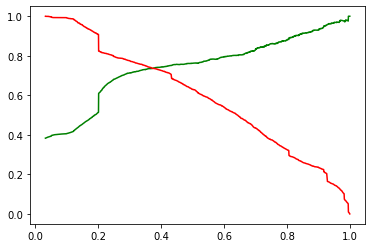

In [216]:
# plotting tradeoff b/w precision and recall

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

***Here we observe that TPR is increasing with each cutoff and FPR is getting decreased with each cutoff***

#### Plotting the ROC Curve

In [217]:
# function to plot ROC curves

def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(10, 7))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return None

In [218]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

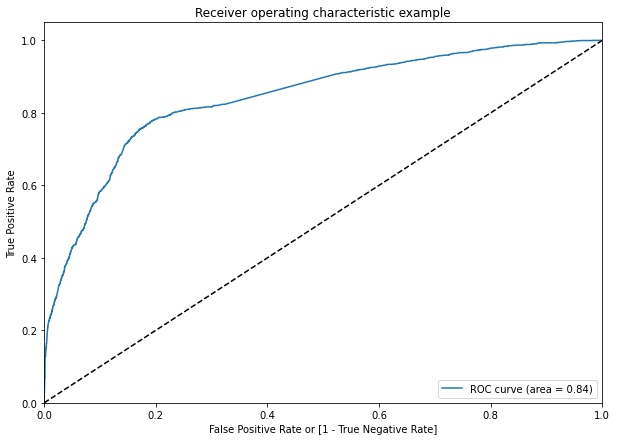

In [219]:
# plotting ROC curve

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

***The area under ROC curve is very high which indicates good predictive capability of model***

#### Finding Optimal Cutoff Point

In [220]:
# generating conversion values for different probability cutoff points b/w 0-1

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.348885,4948,0,1,1,1,1,0,0,0,0,0,0
1,1,0.200436,5938,0,1,1,1,0,0,0,0,0,0,0
2,1,0.805571,5688,1,1,1,1,1,1,1,1,1,1,0
3,0,0.015782,5381,0,1,0,0,0,0,0,0,0,0,0
4,1,0.554919,4742,1,1,1,1,1,1,1,0,0,0,0


In [221]:
# checking accuracy, sensitivity, specificity for each probability cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379141  1.000000  0.000000
0.1   0.1  0.448407  0.991221  0.116926
0.2   0.2  0.638453  0.907609  0.474087
0.3   0.3  0.796798  0.774666  0.810314
0.4   0.4  0.800761  0.725334  0.846822
0.5   0.5  0.785386  0.630017  0.880266
0.6   0.6  0.772547  0.538880  0.915241
0.7   0.7  0.753051  0.435619  0.946898
0.8   0.8  0.727691  0.325669  0.973194
0.9   0.9  0.703598  0.235786  0.989278


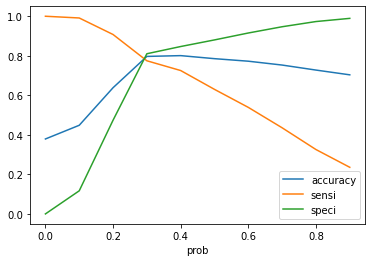

In [222]:
# Plotting accuracy, sensitivity, specificity for each probability cutoffs

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [223]:
# choosing 0.3 as optimal cutoff point and proceeding 

y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.348885,4948,0,1,1,1,1,0,0,0,0,0,0,1
1,1,0.200436,5938,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.805571,5688,1,1,1,1,1,1,1,1,1,1,0,1
3,0,0.015782,5381,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.554919,4742,1,1,1,1,1,1,1,0,0,0,0,1


#### Calculating Lead Score

In [224]:
# calculating 'Lead Score' for each customer in train data

y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_Prob.map(lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.348885,4948,0,1,1,1,1,0,0,0,0,0,0,1,35
1,1,0.200436,5938,0,1,1,1,0,0,0,0,0,0,0,0,20
2,1,0.805571,5688,1,1,1,1,1,1,1,1,1,1,0,1,81
3,0,0.015782,5381,0,1,0,0,0,0,0,0,0,0,0,0,2
4,1,0.554919,4742,1,1,1,1,1,1,1,0,0,0,0,1,55


***Lead score = 100*conversion probability. Hence a score of above 80 indicates more than 80% conversion rate which is the target for the business solution*** 

In [225]:
# checking accuracy after choosing optimal cutoff point 

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7967982247582818

In [226]:
# generating confusion matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3174,  743],
       [ 539, 1853]])

In [227]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [228]:
# checking  sensitivity of logistic regression model on test data

TP / float(TP+FN)

0.7746655518394648

In [229]:
# checking specificity

TN / float(TN+FP)

0.8103140158284401

In [230]:
# checking false postive rate 

print(FP/ float(TN+FP))

0.18968598417155988


In [231]:
# checking positive predictive value 

print (TP / float(TP+FP))

0.7137904468412943


In [232]:
# checking negative predictive value

print (TN / float(TN+ FN))

0.8548343657419876


#### Precision and Recall

Using sklearn utilities 

In [233]:
from sklearn.metrics import precision_score, recall_score

In [234]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7137904468412943

In [235]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7746655518394648

#### Making predictions on the test set

In [236]:
# perform scaling on test data variables

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Misc,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Misc,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
4948,0,0,-0.070265,0.554751,-0.704224,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5938,0,0,-1.146235,-0.890188,-1.261387,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5688,0,0,-1.146235,-0.890188,-1.261387,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5381,1,0,1.364363,-0.415867,0.036802,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4742,0,0,-0.070265,1.126134,0.410102,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [237]:
# selecting columns chosen when final model was derived 

X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Specialization_Hospitality Management,Specialization_Misc,What is your current occupation_Working Professional
1260,0,-0.872768,0,0,1,0,0,1,0
2104,0,-0.872768,0,0,1,0,0,1,0
7105,0,1.496979,0,0,1,0,0,0,0
8916,0,-0.373100,1,0,0,0,0,0,0
2822,0,-0.872768,0,0,1,0,0,1,0


In [238]:
# perform prediction on test data

X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

In [239]:
y_test_pred[:10]

1260    0.203529
2104    0.203529
7105    0.913263
8916    0.192896
2822    0.203529
5885    0.203529
831     0.845849
733     0.120435
2666    0.266130
9120    0.203529
dtype: float64

In [240]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [241]:
# checking data head

y_pred_1.head()

,0
1260,0.203529
2104,0.203529
7105,0.913263
8916,0.192896
2822,0.203529


In [242]:
# convert numpy array to dataframe 

y_test_df = pd.DataFrame(y_test)

In [243]:
# Putting Prospect ID to index

y_test_df['Prospect ID'] = y_test_df.index

In [244]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [245]:
# concating y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [246]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,1260,0.203529
1,1,2104,0.203529
2,1,7105,0.913263
3,0,8916,0.192896
4,0,2822,0.203529


In [247]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [248]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Conversion_Prob'], axis=1)

In [249]:
# checking data head

y_pred_final.head()

,Prospect ID,Converted,Conversion_Prob
0,1260,0,0.203529
1,2104,1,0.203529
2,7105,1,0.913263
3,8916,0,0.192896
4,2822,0,0.203529


In [250]:
#### generating final conversion values using 0.3 prob cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)

y_pred_final['Lead_Score'] = y_pred_final.Conversion_Prob.map(lambda x: round(x*100))

In [251]:
y_pred_final

,Prospect ID,Converted,Conversion_Prob,final_predicted,Lead_Score
0,1260,0,0.203529,0,20
1,2104,1,0.203529,0,20
2,7105,1,0.913263,1,91
3,8916,0,0.192896,0,19
4,2822,0,0.203529,0,20
...,...,...,...,...,...
2700,4661,0,0.203529,0,20
2701,1367,0,0.186672,0,19
2702,8538,1,0.914221,1,91
2703,7349,0,0.789748,1,79


In [252]:
# checking final accuracy on test data

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7926062846580406

In [253]:
# generate confusion matrix

confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1359,  319],
       [ 242,  785]])

In [254]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [255]:
# checking sensitivity of logistic regression model on test set

TP / float(TP+FN)

0.7643622200584226

In [256]:
#checking specificity

TN / float(TN+FP)

0.8098927294398093

In [257]:
col.tolist()

['Do Not Email',
 'Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Specialization_Hospitality Management',
 'Specialization_Misc',
 'What is your current occupation_Working Professional']

***The above are the list of important features that contribute to the prediction of conversion rate of a lead. This can also be verified with the observations from EDA of these variables. Hence inorder to increase the lead count and conversion rate the above features need to be focussed to maximise the output***

***The model performs well on the test set:-***
- Accuracy = 79.26 %
- Sensitivity = 76.36 %
- Specificity = 80.98 %

Hence we can say that the conversion rate of 37% can been increased to 80% with the help of this logistic regression model